In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [260]:
na_values_to_mark_as_na = ["Not Applicable","Not Available"]
survey = pd.read_csv("./Data/Patient_survey__HCAHPS__-_Hospital.csv", 
                     na_values={"Patient Survey Star Rating":na_values_to_mark_as_na,
                                "HCAHPS Answer Percent": na_values_to_mark_as_na,
                                "HCAHPS Linear Mean Value":na_values_to_mark_as_na,
                               "Number of Completed Surveys":na_values_to_mark_as_na,
                               "Survey Response Rate Percent":na_values_to_mark_as_na

                               })

Question I have
1. Not Avaialbe vs Not Aplicable

In [279]:
survey.shape

(245450, 17)

In [281]:
# This shows counts without NaN
survey.count()

Provider ID                              245450
Hospital Name                            245450
City                                     245450
State                                    245450
ZIP Code                                 245450
HCAHPS Measure ID                        245450
HCAHPS Question                          245450
HCAHPS Answer Description                245450
Patient Survey Star Rating                38819
Patient Survey Star Rating Footnote       15180
HCAHPS Answer Percent                    122612
HCAHPS Answer Percent Footnote            44341
HCAHPS Linear Mean Value                  35290
Number of Completed Surveys              211400
Number of Completed Surveys Footnote      76450
Survey Response Rate Percent             211400
Survey Response Rate Percent Footnote     76450
dtype: int64

In [262]:
# getting column names and thier indexes
for ind,val in enumerate(survey.columns):
    print(ind,":", val)

0 : Provider ID
1 : Hospital Name
2 : Address
3 : City
4 : State
5 : ZIP Code
6 : County Name
7 : Phone Number
8 : HCAHPS Measure ID
9 : HCAHPS Question
10 : HCAHPS Answer Description
11 : Patient Survey Star Rating
12 : Patient Survey Star Rating Footnote
13 : HCAHPS Answer Percent
14 : HCAHPS Answer Percent Footnote
15 : HCAHPS Linear Mean Value
16 : Number of Completed Surveys
17 : Number of Completed Surveys Footnote
18 : Survey Response Rate Percent
19 : Survey Response Rate Percent Footnote
20 : Measure Start Date
21 : Measure End Date
22 : Location


In [263]:
# Removing last 3 columns Measure Start Date, Measure End Date, Location
survey.drop(survey.columns[[2,6,7,20,21,22]], axis=1, inplace=True)
survey.head(2)

,Provider ID,Hospital Name,City,State,ZIP Code,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote
0,241335,ST ELIZABETH MEDICAL CENTER,WABASHA,MN,55981,H_COMP_5_LINEAR_SCORE,Communication about medicines - linear mean score,Communication about medicines - linear mean score,NaN,NaN,NaN,NaN,NaN,58.0,6 - Fewer than 100 patients completed the HCAH...,34.0,6 - Fewer than 100 patients completed the HCAH...
1,241322,RAINY LAKE MEDICAL CENTER,INTERNATIONAL FALLS,MN,56649,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",NaN,NaN,4.0,6 - Fewer than 100 patients completed the HCAH...,NaN,86.0,6 - Fewer than 100 patients completed the HCAH...,32.0,6 - Fewer than 100 patients completed the HCAH...


In [264]:
survey.shape

(245450, 17)

# Exploring data a bit

## Grouping by total counts of hospitals by state
### Should we only do our analysis on `TX` states?

In [305]:
np.unique(survey["State"])

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [265]:
unique_hospital_by_state = survey.groupby(["State"]).agg({"Hospital Name":"nunique"}, axis=0).sort_values(by="Hospital Name", ascending=0)
# survey.groupby(["State"]).agg({"Provider ID":"nunique"}) 
unique_hospital_by_state.head(10)

,Hospital Name
State,
TX,402
CA,344
FL,191
IL,183
PA,178
NY,178
OH,169
KS,139
MI,136


Text(0, 0.5, 'Counts')

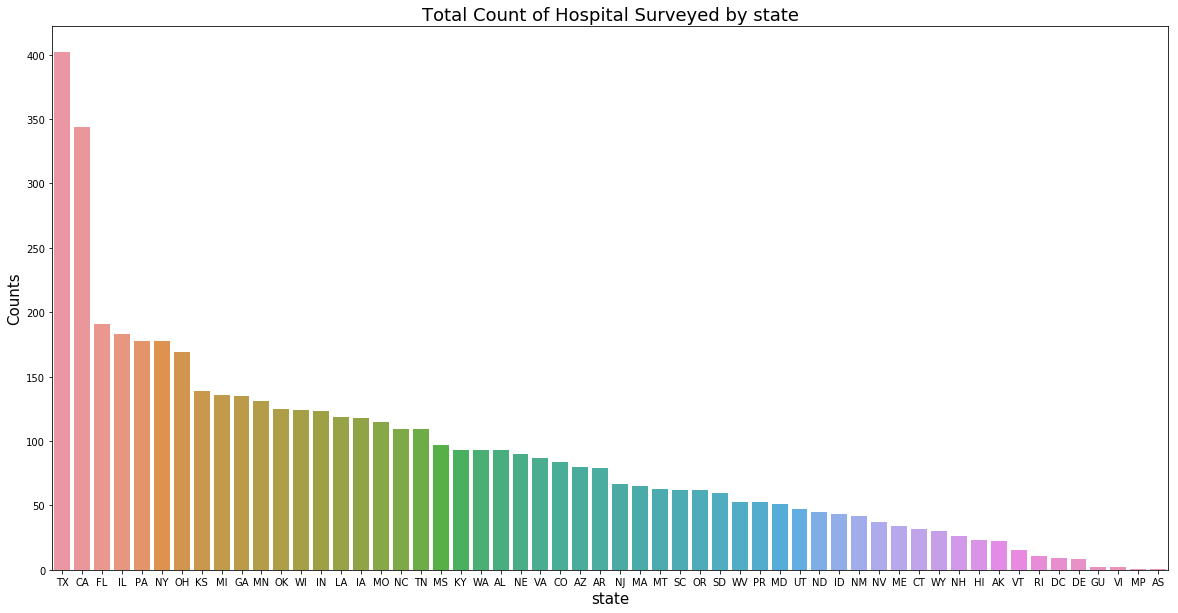

In [266]:
bar_plot_data = unique_hospital_by_state.reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x="State", y="Hospital Name", data=bar_plot_data)
plt.title("Total Count of Hospital Surveyed by state", fontsize=18)
plt.xlabel("state",fontsize=15)
plt.ylabel("Counts",fontsize=15)

## Exploring little bit about `HCAHPS Measure ID` and `HCAHPS Question`

In [267]:
survey["HCAHPS Measure ID"].unique()

array(['H_COMP_5_LINEAR_SCORE', 'H_COMP_1_SN_P', 'H_COMP_5_STAR_RATING',
       'H_STAR_RATING', 'H_COMP_5_SN_P', 'H_HSP_RATING_STAR_RATING',
       'H_CLEAN_LINEAR_SCORE', 'H_HSP_RATING_7_8', 'H_COMP_7_D_SD',
       'H_RECMND_LINEAR_SCORE', 'H_COMP_7_STAR_RATING',
       'H_COMP_7_LINEAR_SCORE', 'H_COMP_7_A', 'H_HSP_RATING_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_1_U_P', 'H_COMP_3_STAR_RATING',
       'H_CLEAN_HSP_A_P', 'H_HSP_RATING_0_6', 'H_QUIET_HSP_A_P',
       'H_RECMND_DN', 'H_COMP_2_U_P', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_3_SN_P', 'H_COMP_6_LINEAR_SCORE', 'H_CLEAN_HSP_SN_P',
       'H_CLEAN_HSP_U_P', 'H_CLEAN_STAR_RATING', 'H_COMP_1_A_P',
       'H_COMP_1_STAR_RATING', 'H_COMP_2_A_P', 'H_COMP_2_SN_P',
       'H_COMP_2_STAR_RATING', 'H_COMP_3_A_P', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_3_U_P', 'H_COMP_5_A_P', 'H_COMP_5_U_P', 'H_COMP_6_N_P',
       'H_COMP_6_STAR_RATING', 'H_COMP_6_Y_P', 'H_COMP_7_SA',
       'H_HSP_RATING_9_10', 'H_QUIET_HSP_SN_P', 'H_QUIET

So look like there are a total of `50` `HCAHPS Measure ID` accorss the dataset.

In [268]:
len(survey["HCAHPS Measure ID"].unique())

50

And the same for `HCAHPS Question`

In [269]:
len(survey["HCAHPS Question"].unique())

50

Making sure that `HCAHPS Measure ID` is a code for `HCAHPS Question`

### This confirms that for each question there is a mesure id. So we could use either the measure id or question as our columns

In [270]:
survey.groupby(["HCAHPS Measure ID","HCAHPS Question"]).size().reset_index().rename(columns={0:'count'})

,HCAHPS Measure ID,HCAHPS Question,count
0,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,4909
1,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,4909
2,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,4909
3,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,4909
4,H_CLEAN_STAR_RATING,Cleanliness - star rating,4909
5,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",4909
6,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,4909
7,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",4909
8,H_COMP_1_STAR_RATING,Nurse communication - star rating,4909
9,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",4909


## Total number of surveys completed by state

In [118]:
survey["Number of Completed Surveys"].fillna(0, inplace=True)

In [271]:
total_surveys = survey.groupby(["State","Hospital Name","Number of Completed Surveys"]).agg({"Number of Completed Surveys":"max"}).rename(columns={'Number of Completed Surveys':'duplicate'})

# [["Number of Completed Surveys"]].sum()
# [["State","Number of Completed Surveys"]]

# .agg({"Number of Completed Surveys":pd.Series.nunique}, axis=0)
total_surveys.head()
# print(type(unique_hospital_by_state))
# .sort_values(by="Hospital Name", ascending=True)
# survey.groupby(["State"]).agg({"Provider ID":"nunique"}) 
# unique_hospital_by_state.head(10)
# unique_hospital_by_state.reset_index()

duplicate
State Hospital Name                      Number of Completed Surveys           
AK    ALASKA NATIVE MEDICAL CENTER       1114.0                          1114.0
      ALASKA REGIONAL HOSPITAL           1217.0                          1217.0
      BARTLETT REGIONAL HOSPITAL         269.0                            269.0
      CENTRAL PENINSULA GENERAL HOSPITAL 403.0                            403.0
      FAIRBANKS MEMORIAL HOSPITAL        634.0                            634.0

In [272]:
total_surveys = total_surveys.reset_index()
total_surveys.drop(["duplicate"], axis=1, inplace=True)

In [273]:
total_surveys.head(2)

,State,Hospital Name,Number of Completed Surveys
0,AK,ALASKA NATIVE MEDICAL CENTER,1114.0
1,AK,ALASKA REGIONAL HOSPITAL,1217.0


In [274]:
total_surveys_filter = total_surveys.groupby(["State"])

In [275]:
total_surveys_filter.get_group("DE")

,State,Hospital Name,Number of Completed Surveys
660,DE,BAYHEALTH - MILFORD MEMORIAL HOSPITAL,751.0
661,DE,"BAYHEALTH HOSPITAL, KENT CAMPUS",956.0
662,DE,BEEBE MEDICAL CENTER,500.0
663,DE,"CHRISTIANA CARE HEALTH SERVICES, INC.",897.0
664,DE,NANTICOKE MEMORIAL HOSPITAL,708.0
665,DE,ST FRANCIS HOSPITAL,565.0
666,DE,WILMINGTON VA MEDICAL CENTER,282.0


In [277]:
total_surveys_filter = total_surveys.groupby(["State"]).sum().sort_values(by="Number of Completed Surveys", ascending=False).reset_index()

Text(0, 0.5, 'Counts')

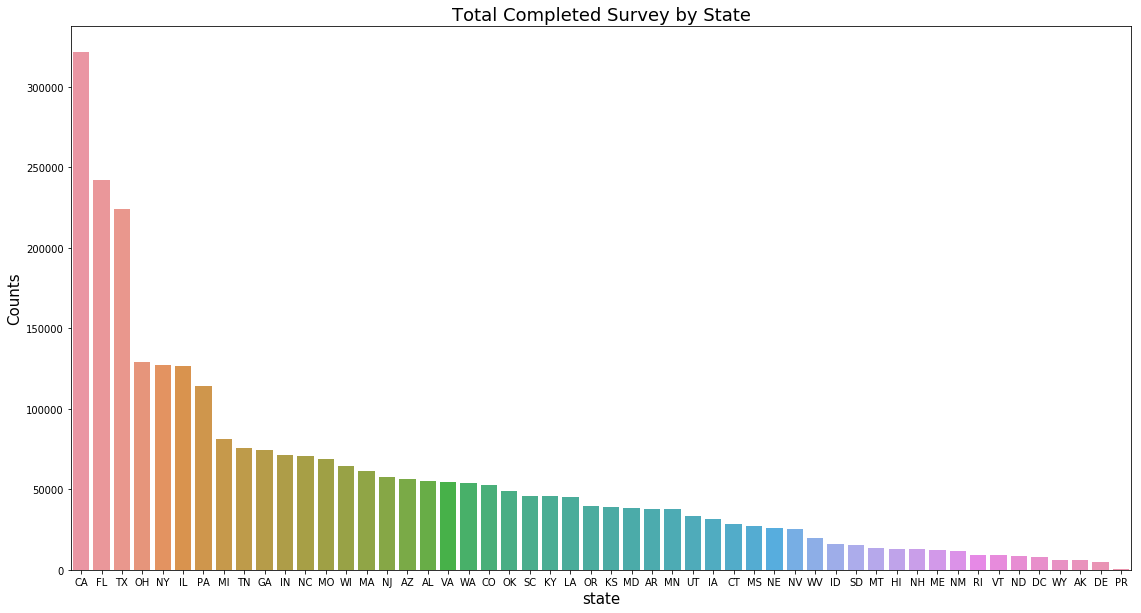

In [306]:
fig = plt.figure(figsize=(19,10))
sns.barplot(x="State", y="Number of Completed Surveys", data=total_surveys_filter)
plt.title("Total Completed Survey by State", fontsize=18)
plt.xlabel("state",fontsize=15)
plt.ylabel("Counts",fontsize=15)

# Pivot'ing the data as suggested in the call

In [283]:
survey.head(2)

,Provider ID,Hospital Name,City,State,ZIP Code,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote
0,241335,ST ELIZABETH MEDICAL CENTER,WABASHA,MN,55981,H_COMP_5_LINEAR_SCORE,Communication about medicines - linear mean score,Communication about medicines - linear mean score,NaN,NaN,NaN,NaN,NaN,58.0,6 - Fewer than 100 patients completed the HCAH...,34.0,6 - Fewer than 100 patients completed the HCAH...
1,241322,RAINY LAKE MEDICAL CENTER,INTERNATIONAL FALLS,MN,56649,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",NaN,NaN,4.0,6 - Fewer than 100 patients completed the HCAH...,NaN,86.0,6 - Fewer than 100 patients completed the HCAH...,32.0,6 - Fewer than 100 patients completed the HCAH...


In [302]:
survey.pivot(index='Provider ID',columns='HCAHPS Measure ID', values=['Patient Survey Star Rating','HCAHPS Answer Percent'])

Patient Survey Star Rating                                   \
HCAHPS Measure ID            H_CLEAN_HSP_A_P H_CLEAN_HSP_SN_P H_CLEAN_HSP_U_P   
Provider ID                                                                     
010001                                   NaN              NaN             NaN   
010005                                   NaN              NaN             NaN   
010006                                   NaN              NaN             NaN   
010007                                   NaN              NaN             NaN   
010008                                   NaN              NaN             NaN   
010011                                   NaN              NaN             NaN   
010012                                   NaN              NaN             NaN   
010016                                   NaN              NaN             NaN   
010018                                   NaN              NaN             NaN   
010019                                   NaN              NaN             NaN   
010021                                   NaN              NaN             NaN   
010022                                   NaN              NaN             NaN   
010023                                   NaN              NaN             NaN   
010024                                   NaN              NaN             NaN   
010029                                   NaN              NaN             NaN   
010032                                   NaN              NaN             NaN   
010033                                   NaN              NaN             NaN   
010034                                   NaN              NaN             NaN   
010035                                   NaN              NaN             NaN   
010036                                   NaN              NaN             NaN   
010038                                   NaN              NaN             NaN   
010039                                   NaN              NaN             NaN   
010040                                   NaN              NaN             NaN   
010044                                   NaN              NaN             NaN   
010045                                   NaN              NaN             NaN   
010046                                   NaN              NaN             NaN   
010047                                   NaN              NaN             NaN   
010049                                   NaN              NaN             NaN   
010051                                   NaN              NaN             NaN   
010052                                   NaN              NaN             NaN   
...                                      ...              ...             ...   
670082                                   NaN              NaN             NaN   
670083                                   NaN              NaN             NaN   
670085                                   NaN              NaN             NaN   
670087                                   NaN              NaN             NaN   
670088                                   NaN              NaN             NaN   
670090                                   NaN              NaN             NaN   
670093                                   NaN              NaN             NaN   
670094                                   NaN              NaN             NaN   
670095                                   NaN              NaN             NaN   
670097                                   NaN              NaN             NaN   
670098                                   NaN              NaN             NaN   
670099                                   NaN              NaN             NaN   
670102                                   NaN              NaN             NaN   
670103                                   NaN              NaN             NaN   
670106                                   NaN              NaN             NaN   
670107                                   NaN     

In [293]:
import numpy as np
np.where(survey.index.duplicated())
0 : Provider ID
1 : Hospital Name
2 : Address
3 : City
4 : State
5 : ZIP Code
6 : County Name
7 : Phone Number
8 : HCAHPS Measure ID
9 : HCAHPS Question
10 : HCAHPS Answer Description
11 : Patient Survey Star Rating
12 : Patient Survey Star Rating Footnote
13 : HCAHPS Answer Percent
14 : HCAHPS Answer Percent Footnote
15 : HCAHPS Linear Mean Value
16 : Number of Completed Surveys
17 : Number of Completed Surveys Footnote
18 : Survey Response Rate Percent
19 : Survey Response Rate Percent Footnote
20 : Measure Start Date
21 : Measure End Date
22 : Location

(array([], dtype=int64),)

In [ ]:
survey.iloc[:,[1,4,]]